# ***Importing Libraries***

In [ ]:
# Importing files

# Data wrangling and analysis
import numpy as np
import pandas as pd

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

# Dates
import datetime
from matplotlib.dates import DateFormatter

# statistical analysis
from scipy.stats import ttest_ind

# Warnings 
import warnings
warnings.filterwarnings('ignore')

# Text analysis
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# ***Import And Read Data***

In [ ]:
transactiondata = pd.read_excel('QVI_transaction_data.xlsx')
customerdata = pd.read_csv('customer.csv')

# ***Transaction Data***

In [ ]:
transactiondata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
transactiondata.shape

(264836, 8)

In [ ]:
transactiondata['TXN_ID'].nunique()

263127

***TXN_ID is not unique to each row. This is because there can be sales of chips with different brands in a single transaction.***

In [ ]:
# Look for duplicated TXN_ID

transactiondata[transactiondata.duplicated(['TXN_ID'])].head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
42,43605,55,55073,48887,113,Twisties Chicken270g,1,4.6
377,43475,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.4
419,43391,12,12301,10982,93,Doritos Corn Chip Southern Chicken 150g,2,7.8
476,43351,16,16427,14546,81,Pringles Original Crisps 134g,1,3.7
511,43315,19,19272,16683,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6


In [ ]:
# Select any duplicated TXN_ID

transactiondata.loc[transactiondata['TXN_ID'] == 7739, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
376,43475,7,7364,7739,50,Tostitos Lightly Salted 175g,2,8.8
377,43475,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.4


In [ ]:
transactiondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


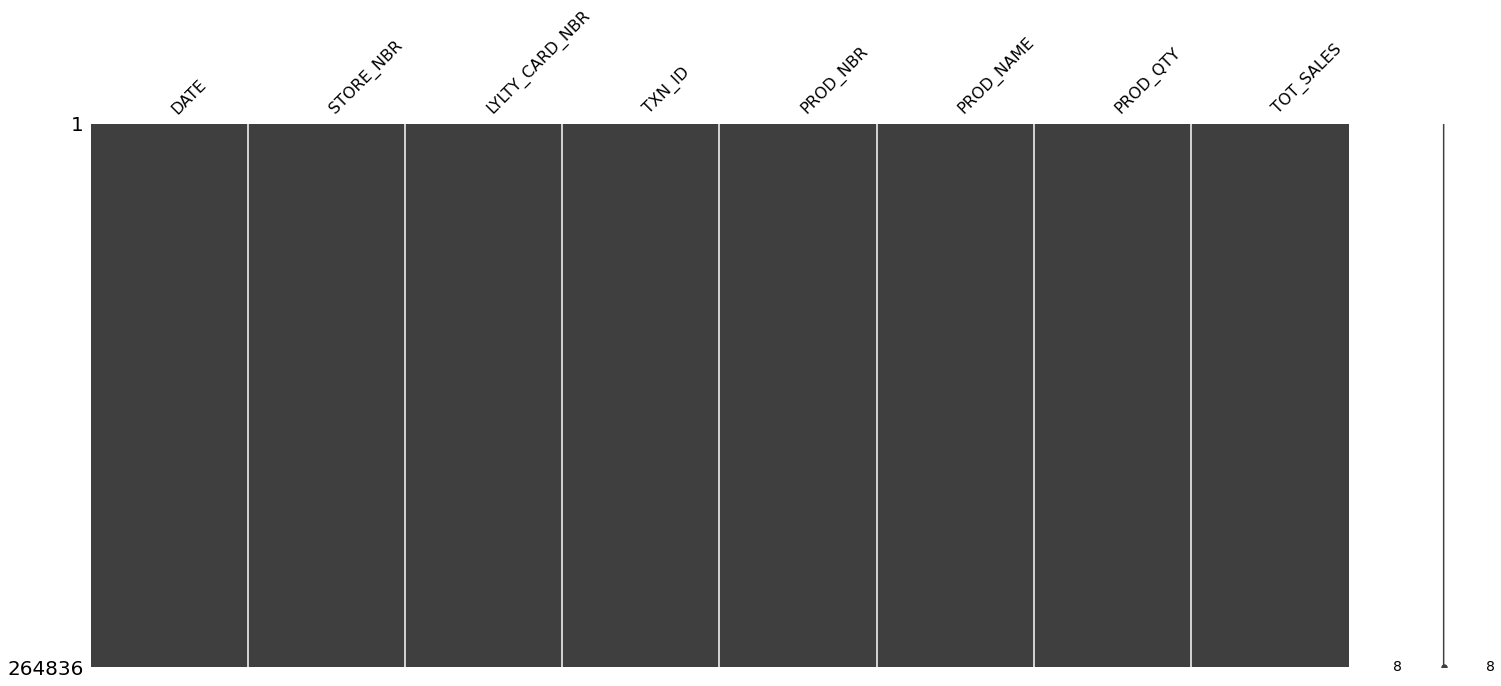

In [ ]:
# Missing values in transactiondata

missingno.matrix(transactiondata)

In [ ]:
# Exploring the features of each dataset one by one starting with transaction data

list(transactiondata.columns)

['DATE',
 'STORE_NBR',
 'LYLTY_CARD_NBR',
 'TXN_ID',
 'PROD_NBR',
 'PROD_NAME',
 'PROD_QTY',
 'TOT_SALES']

In [ ]:
transactiondata['DATE'].head()

0    43390
1    43599
2    43605
3    43329
4    43330
Name: DATE, dtype: int64

In [ ]:
# date is not in the right format

#function to convert excel integer into yyyy-mm-dd format

def xldateconverter(xldate):
  starting_date = datetime.datetime(1900,1,1)
  if(xldate < 60):
    delta_days = datetime.timedelta(days = (xldate - 1))
  else:
    delta_days = datetime.timedelta(days = (xldate - 2))
  converted_days = starting_date + delta_days
  return converted_days

In [ ]:
# Apply function to Date feature in transactionData dataset

transactiondata['DATE'] = transactiondata['DATE'].apply(xldateconverter)

In [ ]:
# Check the first 5 rows of the new date feature

transactiondata['DATE'].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

In [ ]:
# Date is now in the right format

transactiondata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
# First 5 rows of PROD_NAME

transactiondata['PROD_NAME'].head()

0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S/Cream&Onion 175g
4    Kettle Tortilla ChpsHny&Jlpno Chili 150g
Name: PROD_NAME, dtype: object

In [ ]:
# Extracting weights from product name

transactiondata['PACK_SIZE'] = transactiondata['PROD_NAME'].str.extract("(\d+)")
transactiondata['PACK_SIZE'] = pd.to_numeric(transactiondata['PACK_SIZE'])
transactiondata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [ ]:
# creating function for text cleaning of PROD_NAME

def clean_text(text):
  text = re.sub('[&/]',' ',text)
  text = re.sub('\d\w*', ' ',text)
  return text

# Applying thet text cleaning function to PROD_NAME

transactiondata['PROD_NAME'] = transactiondata['PROD_NAME'].apply(clean_text)

In [ ]:
transactiondata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150


In [ ]:
# Value counts of PROD_QTY

transactiondata['PROD_QTY'].value_counts()

2      236039
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64

***We have two occurences of 200 in the dataset. This seems odd so let's explore further.***

In [ ]:
transactiondata.loc[transactiondata['PROD_QTY'] == 200 , :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


***Both these transactions have been made by the same person at the same store. Let's see all the transactions this person has made by tracking his loyalty card number.***

In [ ]:
transactiondata.loc[transactiondata['LYLTY_CARD_NBR'] == 226000, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


***This customer has only made two transactions over the entire year so unlikely to be a retail customer. He/she is most likely purchasing for commercial purposes so it is safe for us to drop these this customer from both 'transactionData' and 'customerData' dataset.***

In [ ]:
transactiondata.drop(transactiondata.index[transactiondata['LYLTY_CARD_NBR'] == 226000], inplace=True)
customerdata.drop(customerdata.index[customerdata['LYLTY_CARD_NBR'] == 226000], inplace=True)

In [ ]:
# Make sure it has been dropped 

transactiondata.loc[transactiondata['LYLTY_CARD_NBR'] == 226000, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE


In [ ]:
# Now let's examine the number of transactions over time to see if there are any obvious data issues e.g. missing data

transactiondata['DATE'].nunique()

364

In [ ]:
# Look for the missing date

pd.date_range(start= '2018-07-01' , end= '2019-06-30').difference(transactiondata['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

***We have a missing date on Christmas Day. This makes sense because most retail stores are closed that day.***

In [ ]:
# Create a new dataframe which contains the total sale for each date

a = pd.pivot_table(transactiondata, values='TOT_SALES', index= 'DATE', aggfunc='sum')
a.head()

,TOT_SALES
DATE,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


In [ ]:
b = pd.DataFrame(index = pd.date_range(start= '2018-07-01', end='2019-06-30'))
b['TOT_SALES'] = 0
len(b)

365

In [ ]:
c = a+b
c.fillna(0, inplace = True)

In [ ]:
c.head()

,TOT_SALES
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


In [ ]:
c.index.name = 'Date'
c.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)
c.head()


,Total Sales
Date,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


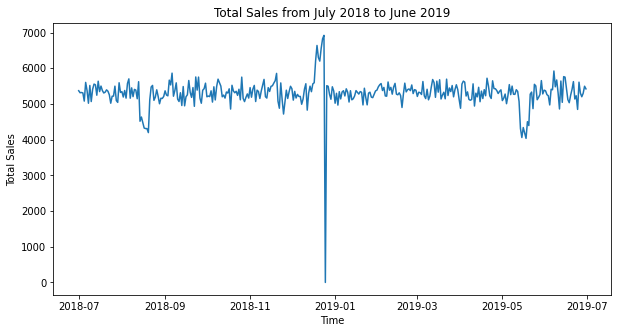

In [ ]:
timeline = c.index
graph = c['Total Sales']

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(timeline, graph)

date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
plt.title('Total Sales from July 2018 to June 2019')
plt.xlabel('Time')
plt.ylabel('Total Sales')

plt.show()


***We can see that sales spike up during the December month and zero sale on Christmas Day.***

In [ ]:
# Confirm the date where sales count equals to zero

c[c['Total Sales'] == 0]

,Total Sales
Date,
2018-12-25,0.0


In [ ]:
# Let's look at the December month only

c_december = c[(c.index > "2018-11-30") & (c.index < "2019-01-01")]
c_december.head()

,Total Sales
Date,
2018-12-01,5427.6
2018-12-02,5108.2
2018-12-03,5353.3
2018-12-04,5167.3
2018-12-05,5268.0


Text(0.5, 1.0, 'Total Sales in December')

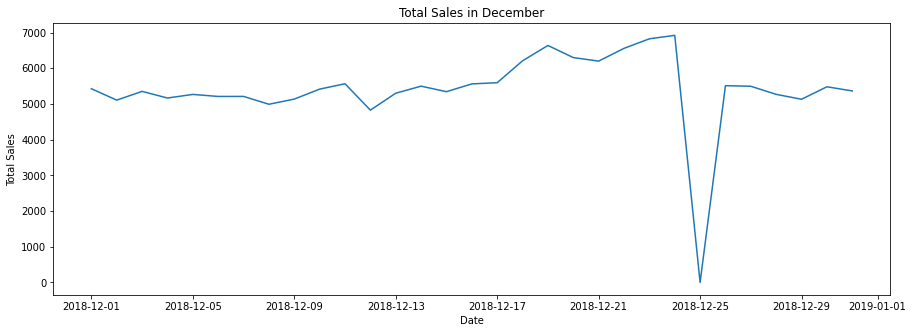

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(c_december)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales in December')

In [ ]:
# Reset index

c_december.reset_index(drop = True , inplace= True)
c_december.head()

,Total Sales
0,5427.6
1,5108.2
2,5353.3
3,5167.3
4,5268.0


In [ ]:
# Relabel Date

c_december['Date'] = c_december.index+1
c_december.head()

,Total Sales,Date
0,5427.6,1
1,5108.2,2
2,5353.3,3
3,5167.3,4
4,5268.0,5


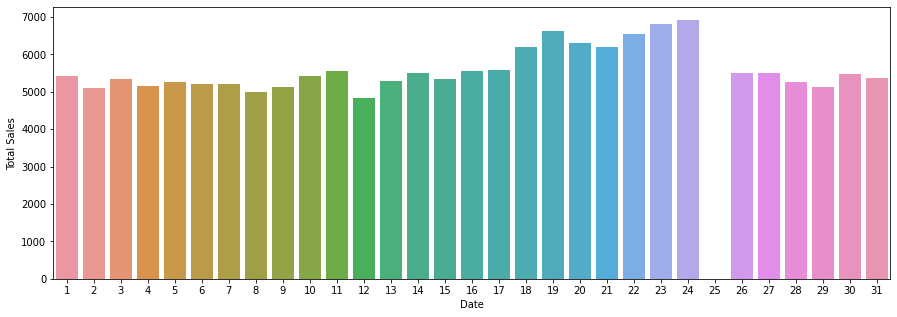

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Date', y ='Total Sales', data = c_december)

***Now, we move on to PACK_SIZE that we created at the beginning by extracting the weight from the PROD_NAME column.***

In [ ]:
transactiondata['PACK_SIZE'].head()

0    175
1    175
2    170
3    175
4    150
Name: PACK_SIZE, dtype: int64

In [ ]:
transactiondata['PACK_SIZE'].unique()

array([175, 170, 150, 300, 330, 210, 270, 220, 125, 110, 134, 380, 180,
       165, 135, 250, 200, 160, 190,  90,  70])

Text(0.5, 1.0, 'Pack Size Histogram')

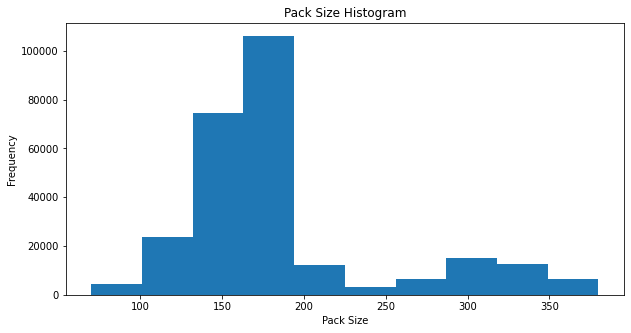

In [ ]:
# Check the distribution of PACK_SIZE

plt.figure(figsize = (10, 5))
plt.hist(transactiondata['PACK_SIZE'])     
plt.xlabel('Pack Size')
plt.ylabel('Frequency')
plt.title('Pack Size Histogram')

In [ ]:
# Extract brand name from PROD_NAME and create new column called BRAND

part = transactiondata['PROD_NAME'].str.partition()
transactiondata['BRAND'] = part[0]
transactiondata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150,Kettle


In [ ]:
transactiondata['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

In [ ]:
# Rename brand names for consistency

transactiondata['BRAND'].replace('Ncc', 'Natural', inplace = True)
transactiondata['BRAND'].replace('Ccs', 'CCS', inplace = True)
transactiondata['BRAND'].replace('Smith', 'Smiths', inplace = True)
transactiondata['BRAND'].replace(['Grain', 'Grnwves'], 'Grainwaves', inplace = True)
transactiondata['BRAND'].replace('Dorito', 'Doritos', inplace = True)
transactiondata['BRAND'].replace('Ww', 'Woolworths', inplace = True)
transactiondata['BRAND'].replace('Infzns', 'Infuzions', inplace = True)
transactiondata['BRAND'].replace(['Red', 'Rrd'], 'Red Rock Deli', inplace = True)
transactiondata['BRAND'].replace('Snbts', 'Sunbites', inplace = True)

transactiondata['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grainwaves',
       'Doritos', 'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'GrnWves', 'Tyrrells',
       'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Sunbites'], dtype=object)

In [ ]:
# Which brand has the most sales?
transactiondata.groupby('BRAND').TOT_SALES.sum().sort_values(ascending = False)

BRAND
Kettle           390239.8
Doritos          240590.9
Smiths           224660.2
Pringles         177655.5
Infuzions         99047.6
Old               90785.1
Thins             88852.5
Twisties          81522.1
Tostitos          79789.6
Cobs              70569.8
RRD               64954.5
Tyrrells          51647.4
Grainwaves        43048.8
Cheezels          40029.9
WW                35889.5
Natural           34272.0
Red Rock Deli     30091.5
CCs               18078.9
Cheetos           16884.5
Woolworths        13454.1
Sunbites           9676.4
GrnWves            8568.4
NCC                8046.0
French             7929.0
Burger             6831.0
Name: TOT_SALES, dtype: float64

# ***Customer Data***

In [ ]:
list(customerdata)

['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']

In [ ]:
customerdata.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


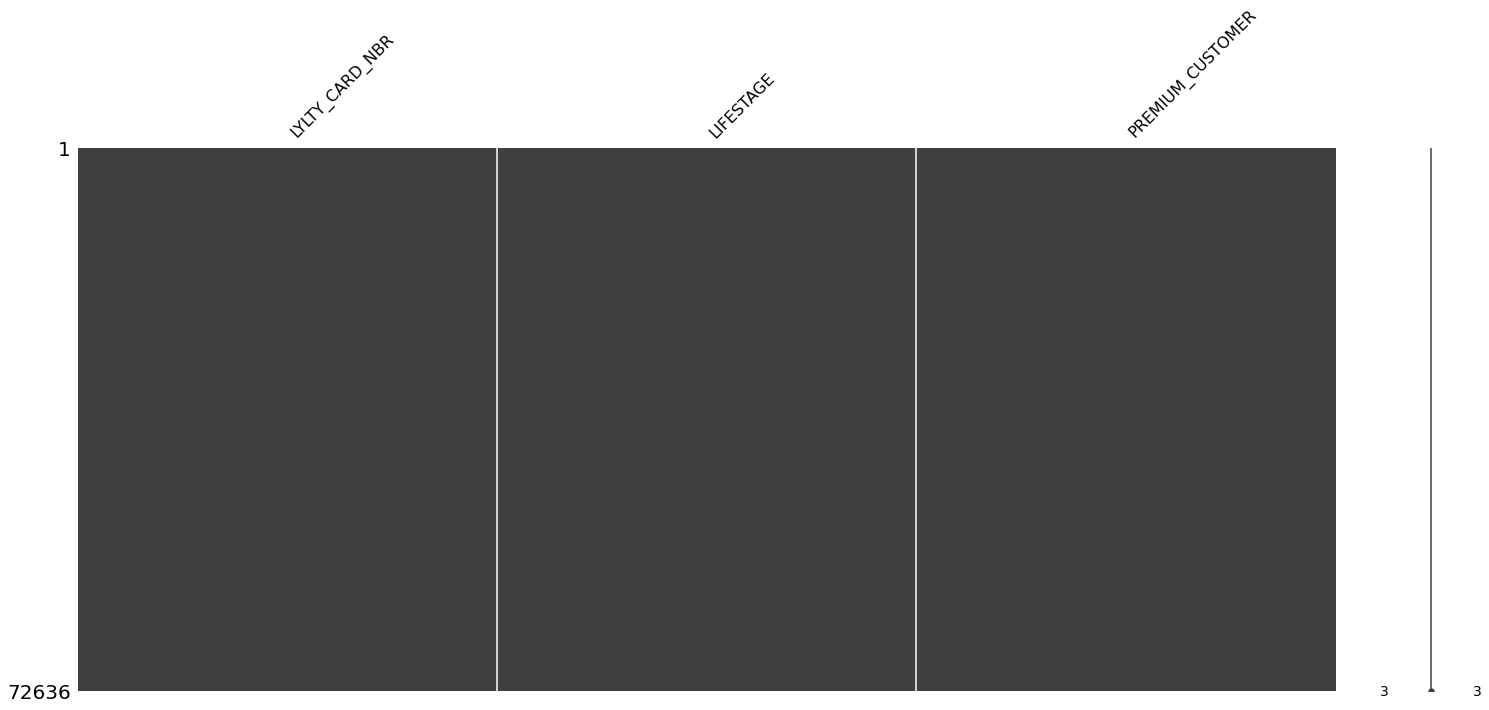

In [ ]:
# Missing values in customerData

missingno.matrix(customerdata)

In [ ]:
len(customerdata)

72636

In [ ]:
customerdata['LYLTY_CARD_NBR'].nunique()

72636

***Since the number of rows in customerdata is equal to number of unique loyalty card number, we conclude that loyalty card numbers are unique to each row.***


In [ ]:
# How many unique lifestages?

customerdata['LIFESTAGE'].nunique()

7

In [ ]:
# What are those lifestages?

customerdata['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [ ]:
# Value counts for lifestages

customerdata['LIFESTAGE'].value_counts().sort_values(ascending = False)

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9779
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

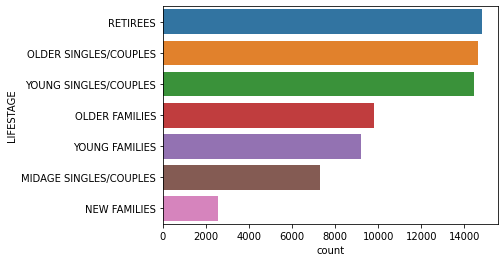

In [ ]:
sns.countplot(y = customerdata['LIFESTAGE'] , order= customerdata['LIFESTAGE'].value_counts().index)

In [ ]:
# How many unique premium customer categories?

customerdata['PREMIUM_CUSTOMER'].nunique()

3

In [ ]:
# Value counts for each premium customer category

customerdata['PREMIUM_CUSTOMER'].value_counts().sort_values(ascending = False)

Mainstream    29245
Budget        24470
Premium       18921
Name: PREMIUM_CUSTOMER, dtype: int64

Text(0, 0.5, 'Premium Customers')

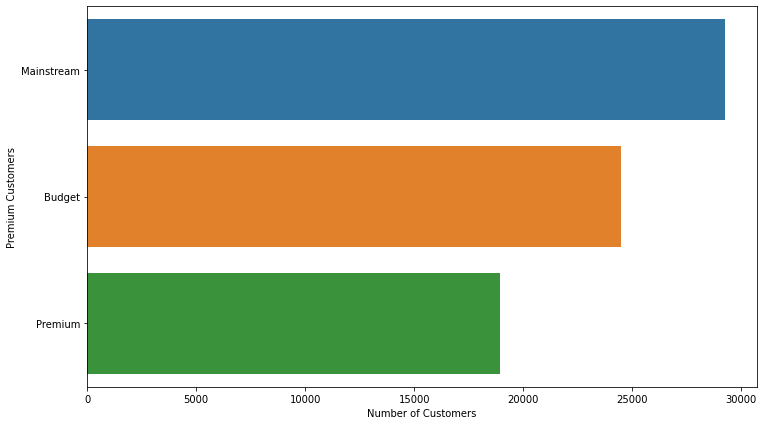

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(y = customerdata['PREMIUM_CUSTOMER'] , order = customerdata['PREMIUM_CUSTOMER'].value_counts().index)
plt.xlabel('Number of Customers')
plt.ylabel('Premium Customers')

In [ ]:
# Merge transactiondata and customerdata together

combinedata = pd.merge(transactiondata , customerdata)

In [ ]:
# Check for null values

print("transactiondata shape: " , transactiondata.shape)
print("customerdata shape: " , customerdata.shape)
print("combinedata shape: " , combinedata.shape)

transactiondata shape:  (264834, 10)
customerdata shape:  (72636, 3)
combinedata shape:  (264834, 12)


In [ ]:
combinedata.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

# **Data Analysis On Customer Segment**

***Now that our data is ready for analysis, we can define some metrics of interest to the client:***



*   ***Who spends the most on chips, describing customers by lifestage and how premium their general purchasing behaviour is***
*   ***How many customers are in each segment***


*  ***How many chips are bought per customer by segment***
*  ***What is the average chip price by customer segment***


In [ ]:
# Total sales by PREMIUM_CUSTOMER and LIFESTAGE

sales = pd.DataFrame(combinedata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum())
sales.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)
sales.sort_values(by = 'Total Sales', ascending = False, inplace = True)
sales


Total Sales
PREMIUM_CUSTOMER LIFESTAGE                          
Budget           OLDER FAMILIES            168363.25
Mainstream       YOUNG SINGLES/COUPLES     157621.60
                 RETIREES                  155677.05
Budget           YOUNG FAMILIES            139345.85
                 OLDER SINGLES/COUPLES     136769.80
Mainstream       OLDER SINGLES/COUPLES     133393.80
Premium          OLDER SINGLES/COUPLES     132263.15
Budget           RETIREES                  113147.80
Mainstream       OLDER FAMILIES            103445.55
Premium          RETIREES                   97646.05
Mainstream       YOUNG FAMILIES             92788.75
                 MIDAGE SINGLES/COUPLES     90803.85
Premium          YOUNG FAMILIES             84025.50
                 OLDER FAMILIES             80658.40
Budget           YOUNG SINGLES/COUPLES      61141.60
Premium          MIDAGE SINGLES/COUPLES     58432.65
                 YOUNG SINGLES/COUPLES      41642.10
Budget           MIDAGE SINGLES/COUPLES     35514.80
                 NEW FAMILIES               21928.45
Mainstream       NEW FAMILIES               17013.90
Premium          NEW FAMILIES               11491.10

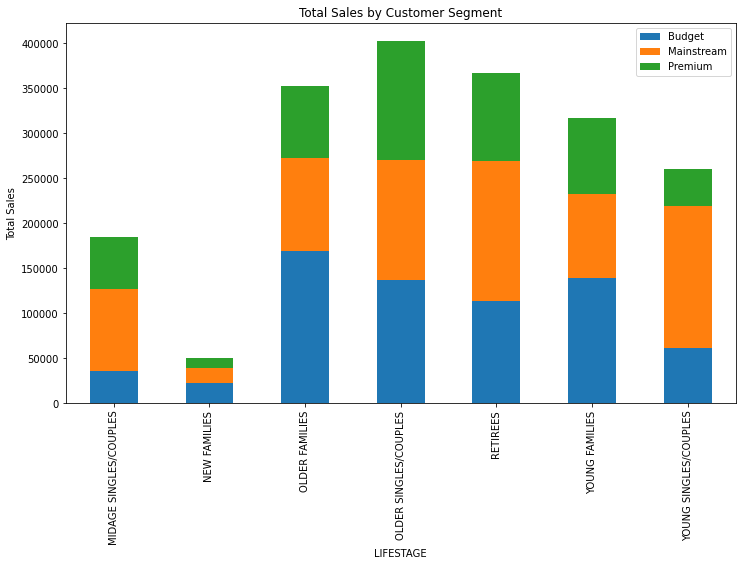

In [ ]:
# Visualise

salesPlot = pd.DataFrame(combinedata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum())
salesPlot.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Total Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 1)

***Top 3 sales come from budget older families, mainstream young singles/couples and mainstream retirees.***

In [ ]:
# Number of customers by PREMIUM_CUSTOMER and LIFESTAGE

customers = pd.DataFrame(combinedata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique())
customers.rename(columns = {'LYLTY_CARD_NBR': 'Number of Customers'}, inplace = True)
customers.sort_values(by = 'Number of Customers', ascending = False).head(10)

Number of Customers
PREMIUM_CUSTOMER LIFESTAGE                                 
Mainstream       YOUNG SINGLES/COUPLES                 8088
                 RETIREES                              6479
                 OLDER SINGLES/COUPLES                 4930
Budget           OLDER SINGLES/COUPLES                 4929
Premium          OLDER SINGLES/COUPLES                 4750
Budget           OLDER FAMILIES                        4675
                 RETIREES                              4454
                 YOUNG FAMILIES                        4017
Premium          RETIREES                              3872
Budget           YOUNG SINGLES/COUPLES                 3779

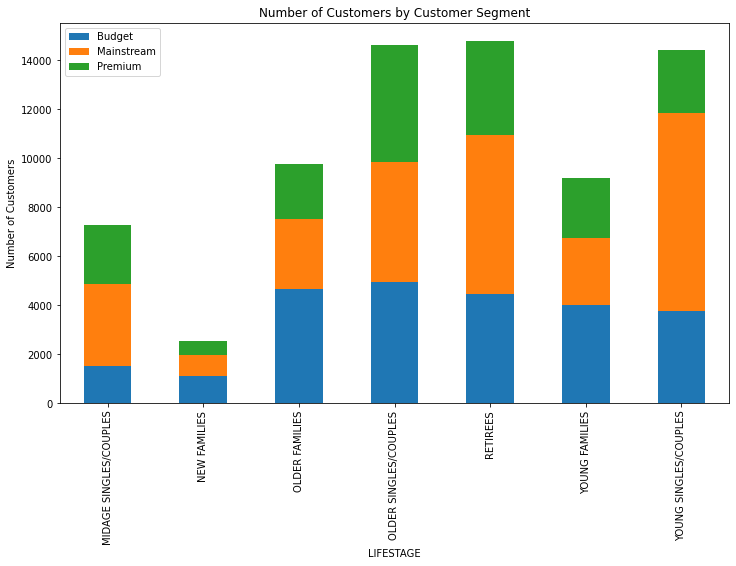

In [ ]:
# Visualise

customersPlot = pd.DataFrame(combinedata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
customersPlot.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Number of Customers by Customer Segment')
plt.ylabel('Number of Customers')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

***There are more mainstream young singles/couples and retirees. This contributes to more chips sales in these segments however this is not the major driver for the budget older families segment.***

In [ ]:
# Average units per customer by PREMIUM_CUSTOMER and LIFESTAGE

avg_units = combinedata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum() / combinedata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()
avg_units = pd.DataFrame(avg_units, columns = {'Average Unit per Customer'})
avg_units.sort_values(by = 'Average Unit per Customer', ascending = False).head()

,,Average Unit per Customer
PREMIUM_CUSTOMER,LIFESTAGE,
Mainstream,OLDER FAMILIES,9.804309
Budget,OLDER FAMILIES,9.639572
Premium,OLDER FAMILIES,9.578091
Budget,YOUNG FAMILIES,9.238486
Premium,YOUNG FAMILIES,9.209207


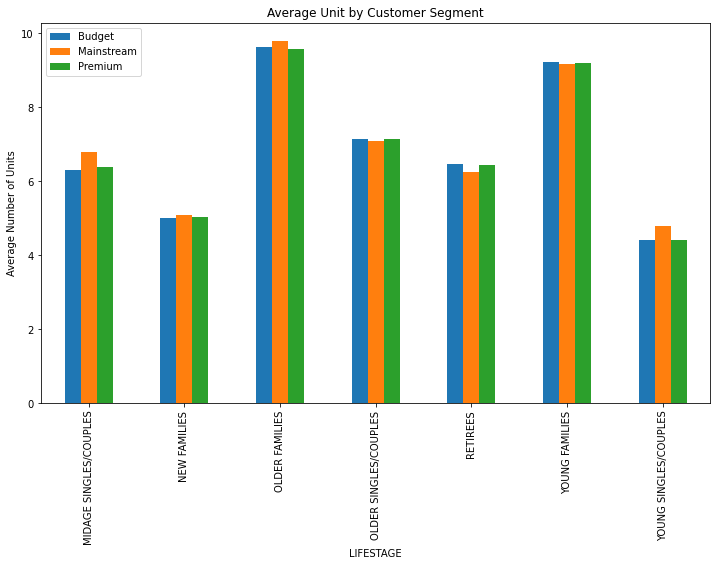

In [ ]:
# Visualise 

avgUnitsPlot = pd.DataFrame(combinedata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum() / combinedata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
avgUnitsPlot.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Unit by Customer Segment')
plt.ylabel('Average Number of Units')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

***Older families and young families buy more chips per customer.***

In [ ]:
# Average price per unit by PREMIUM_CUSTOMER and LIFESTAGE

avg_price = combinedata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum() / combinedata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum()
avg_price = pd.DataFrame(avg_price, columns = {'Price per Unit'})
avg_price.sort_values(by = 'Price per Unit', ascending = False).head()

Price per Unit
PREMIUM_CUSTOMER LIFESTAGE                             
Mainstream       YOUNG SINGLES/COUPLES         4.080079
                 MIDAGE SINGLES/COUPLES        4.000346
                 NEW FAMILIES                  3.939315
Budget           NEW FAMILIES                  3.936178
                 RETIREES                      3.933660

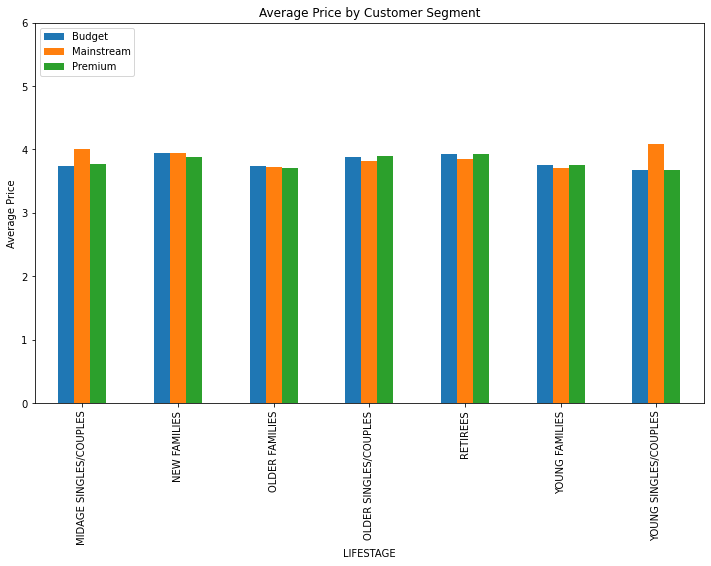

In [ ]:
#visualize

avgPricePlot = pd.DataFrame(combinedata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum() / combinedata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum())
avgPricePlot.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Price by Customer Segment', ylim = (0, 6))
plt.ylabel('Average Price')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

***Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they do buy chips, it is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.***

In [ ]:
#we might want to target customers segments that contribute the most to sales to retain them to further increase sales. 
#Let's examine mainstream young singles/couples against the rest of the cutomer segments to see if they 
#prefer any particular brand of chips.
target = combinedata.loc[(combinedata['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (combinedata['PREMIUM_CUSTOMER'] == 'Mainstream'), :]
nonTarget = combinedata.loc[(combinedata['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES' ) & (combinedata['PREMIUM_CUSTOMER'] != 'Mainstream'), :]
target.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
237700,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snag Sauce,1,2.6,150,Smiths,YOUNG SINGLES/COUPLES,Mainstream
237701,2018-10-02,1,1020,27,7,Smiths Crinkle Original,1,5.7,330,Smiths,YOUNG SINGLES/COUPLES,Mainstream
237702,2019-05-02,1,1020,28,84,GrnWves Plus Btroot Chilli Jam,1,3.1,180,GrnWves,YOUNG SINGLES/COUPLES,Mainstream
237703,2018-08-17,1,1163,188,46,Kettle Original,1,5.4,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream
237704,2019-02-07,1,1163,189,12,Natural Chip Co Tmato Hrb Spce,1,3.0,175,Natural,YOUNG SINGLES/COUPLES,Mainstream


 ***Affinity to Brand***

In [ ]:
# Target Segment
targetBrand = target.loc[:, ['BRAND', 'PROD_QTY']]
targetSum = targetBrand['PROD_QTY'].sum()
targetBrand['Target Brand Affinity'] = targetBrand['PROD_QTY'] / targetSum
targetBrand = pd.DataFrame(targetBrand.groupby('BRAND')['Target Brand Affinity'].sum())

# Non-target segment
nonTargetBrand = nonTarget.loc[:, ['BRAND', 'PROD_QTY']]
nonTargetSum = nonTargetBrand['PROD_QTY'].sum()
nonTargetBrand['Non-Target Brand Affinity'] = nonTargetBrand['PROD_QTY'] / nonTargetSum
nonTargetBrand = pd.DataFrame(nonTargetBrand.groupby('BRAND')['Non-Target Brand Affinity'].sum())

In [ ]:
# Merge the two dataframes together

brand_proportions = pd.merge(targetBrand, nonTargetBrand, left_index = True, right_index = True)
brand_proportions.head()

,Target Brand Affinity,Non-Target Brand Affinity
BRAND,,
Burger,0.002744,0.006094
CCs,0.010484,0.017191
Cheetos,0.007533,0.010960
Cheezels,0.016851,0.017619
Cobs,0.041856,0.035836


In [ ]:
brand_proportions['Affinity to Brand'] = brand_proportions['Target Brand Affinity'] / brand_proportions['Non-Target Brand Affinity']
brand_proportions.sort_values(by = 'Affinity to Brand', ascending = False)

,Target Brand Affinity,Non-Target Brand Affinity,Affinity to Brand
BRAND,,,
Tyrrells,0.029587,0.023968,1.234454
Twisties,0.043306,0.035355,1.224877
Kettle,0.185649,0.155243,1.195863
Tostitos,0.042581,0.035744,1.191269
Old,0.041598,0.034931,1.190850
Pringles,0.111980,0.094240,1.188241
Grainwaves,0.027309,0.023200,1.177104
Cobs,0.041856,0.035836,1.167987
Doritos,0.122877,0.105278,1.167174


***Mainstream young singles/couples are more likely to purchase Tyrrells chips compared to other brands.***

 ***Affinity to pack size***

In [ ]:
# Target segment 
targetSize = target.loc[:, ['PACK_SIZE', 'PROD_QTY']]
targetSum = targetSize['PROD_QTY'].sum()
targetSize['Target Pack Affinity'] = targetSize['PROD_QTY'] / targetSum
targetSize = pd.DataFrame(targetSize.groupby('PACK_SIZE')['Target Pack Affinity'].sum())

# Non-target segment
nonTargetSize = nonTarget.loc[:, ['PACK_SIZE', 'PROD_QTY']]
nonTargetSum = nonTargetSize['PROD_QTY'].sum()
nonTargetSize['Non-Target Pack Affinity'] = nonTargetSize['PROD_QTY'] / nonTargetSum
nonTargetSize = pd.DataFrame(nonTargetSize.groupby('PACK_SIZE')['Non-Target Pack Affinity'].sum())

In [ ]:
# Merge the two dataframes together

pack_proportions = pd.merge(targetSize, nonTargetSize, left_index = True, right_index = True)
pack_proportions.head()

,Target Pack Affinity,Non-Target Pack Affinity
PACK_SIZE,,
70,0.002847,0.005857
90,0.005954,0.011756
110,0.099658,0.083489
125,0.002821,0.005570
134,0.111980,0.094240


In [ ]:
pack_proportions['Affinity to Pack'] = pack_proportions['Target Pack Affinity'] / pack_proportions['Non-Target Pack Affinity']
pack_proportions.sort_values(by = 'Affinity to Pack', ascending = False)

,Target Pack Affinity,Non-Target Pack Affinity,Affinity to Pack
PACK_SIZE,,,
270,0.029846,0.023366,1.277295
380,0.030156,0.023964,1.258400
330,0.057465,0.047511,1.209522
110,0.099658,0.083489,1.193675
134,0.111980,0.094240,1.188241
210,0.027309,0.023200,1.177104
135,0.013849,0.012053,1.149001
250,0.013460,0.011989,1.122716
170,0.075740,0.074888,1.011386


***It looks like mainstream singles/couples are more likely to purchase a 270g pack size compared to other pack sizes.***

In [ ]:
# Which brand offers 270g pack size?

combinedata.loc[combinedata['PACK_SIZE'] == 270, :].head(10)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
40,2019-05-18,9,9208,8634,15,Twisties Cheese,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget
96,2018-08-24,39,39167,35639,113,Twisties Chicken,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget
148,2019-05-06,54,54305,48304,15,Twisties Cheese,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget
155,2019-05-20,55,55073,48887,113,Twisties Chicken,1,4.6,270,Twisties,MIDAGE SINGLES/COUPLES,Budget
245,2019-01-01,80,80182,78980,15,Twisties Cheese,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget
293,2018-11-18,84,84096,83672,113,Twisties Chicken,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget
294,2019-05-20,88,88320,87811,113,Twisties Chicken,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget
339,2018-07-11,102,102115,102207,15,Twisties Cheese,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget
412,2019-04-05,118,118007,120735,113,Twisties Chicken,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget
415,2018-07-01,119,119051,122360,113,Twisties Chicken,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
# Is Twisties the only brand who sells 270g pack size?

combinedata.loc[combinedata['PACK_SIZE'] == 270, 'BRAND'].unique()

array(['Twisties'], dtype=object)

***Twisties is the only brand that offers 270g pack size.***

# ***CONCLUSION***





1. Sales are highest for (Budget, OLDER FAMILIES), (Mainstream, YOUNG SINGLES/COUPLES) and (Mainstream, RETIREES)
2. We found that (Mainstream, YOUNG SINGLES/COUPLES) and (Mainstream, RETIREES) are mainly due to the fact that there are more customers in these segments
3. (Mainstream, YOUNG SINGLES/COUPLES) are more likely to pay more per packet of chips than their premium and budget counterparts
4. They are also more likely to purchase 'Tyrrells' and '270g' pack sizes than the rest of the population
